In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json 
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FuncFormatter,ScalarFormatter
from itertools import cycle, islice
import math
import pandas as pd

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Computer Modern Sans serif'
# plt.rcParams['text.latex.unicode'] = True

               None      GPU-*
q1.1     482.885000  203.38000
q2.1     486.778000  300.78600
q3.1     487.885000  301.11700
q4.1     729.825000  442.41400
geomean  537.870486  300.45712


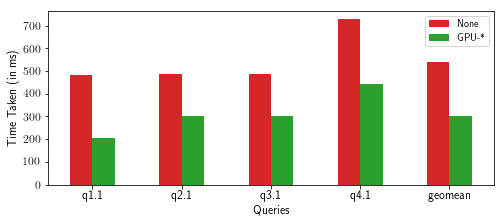

In [2]:
# Query Performance
import pandas as pd
import json

data = {}

# queries = ['q11','q12','q13','q21','q22','q23','q31','q32','q33','q34','q41','q42','q43']
queries = ['q11','q21','q31','q41']
           
times = []
times_inc = []


# Standalone GPU Results
loc = "logs/ssb/20/"
crystal_runtimes = []
for query in queries:
    logs = open(loc + query).readlines()
    all_runs = [float(json.loads(line)['time_transfer_query']) for line in logs if 'time_transfer_query' in line]
    runtime = min(all_runs)
    crystal_runtimes.append(runtime)

gm = geo_mean(crystal_runtimes)
crystal_runtimes.append(gm)

data['None'] = crystal_runtimes

loc = "logs/ssb/20/"
bin_runtimes = []
for query in queries:
    logs = open(loc + query + 'e').readlines()
    all_runs = [float(json.loads(line)['time_transfer_query']) for line in logs if 'time_transfer_query' in line]
    runtime = min(all_runs)
    bin_runtimes.append(runtime)

gm = geo_mean(bin_runtimes)
bin_runtimes.append(gm)
    
data['Coprocessor+GPU-FOR'] = bin_runtimes

loc = "logs/ssb/20/"
bin_runtimes = []
for query in queries:
    logs = open(loc + query + 'e').readlines()
    all_runs = [float(json.loads(line)['time_transfer_query']) for line in logs if 'time_transfer_query' in line]
    runtime = min(all_runs)
    bin_runtimes.append(runtime)

gm = geo_mean(bin_runtimes)
bin_runtimes.append(gm)
    
data['GPU-*'] = bin_runtimes


loc = "logs/ssb/20/"
dbin_runtimes = []
for query in queries:
    logs = open(loc + query + 'd').readlines()
    all_runs = [float(json.loads(line)['time_transfer_query']) for line in logs if 'time_transfer_query' in line]
    runtime = min(all_runs)
    dbin_runtimes.append(runtime)

gm = geo_mean(dbin_runtimes)
dbin_runtimes.append(gm)
data['Coprocessor+GPU-DFOR'] = dbin_runtimes

loc = "logs/ssb/20/"
base_runtimes = []
for query in queries:
    logs = open(loc + query + 'base_t').readlines()
    all_runs = [float(json.loads(line)['time_transfer_query']) for line in logs if 'time_transfer_query' in line]
    runtime = min(all_runs)
    base_runtimes.append(runtime)

gm = geo_mean(base_runtimes)
base_runtimes.append(gm)
data['Baseline+Crystal'] = base_runtimes


# df = pd.DataFrame(data, index=['q1.1','q1.2','q1.3','q2.1','q2.2','q2.3','q3.1','q3.2','q3.3','q3.4','q4.1','q4.2','q4.3', 'geomean'])

df = pd.DataFrame(data, index=['q1.1','q2.1','q3.1','q4.1','geomean'])

df = df[['None', 'GPU-*']]

# print(df['OnDemand+Crystal'], df['OnDemand+GPU-FOR+Crystal'], df['OnDemand+GPU-DFOR+Crystal'])

print(df)

#plt.style.use('ggplot')
my_colors = list(islice(cycle([tableau20[6], tableau20[4], tableau20[10], tableau20[1], 'k']), None, len(df)))
plt.rcParams["figure.figsize"] = (8,3.2)
fig, ax = plt.subplots()
# ax.set_yscale('log')
#ax.set_ylim(0,40)
df.plot(kind='bar', ax = ax, color=my_colors, rot=0, fontsize=12)
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=0)

ax.set_xlabel('Queries', fontsize=12)
ax.set_ylabel('Time Taken (in ms)', fontsize=12)

plt.savefig('overPCIe2.pdf', bbox_inches='tight')

         Standalone (CPU)   Planner     NVComp      None     GPU-*
q1.1            34.309000  12.23780   7.188900  2.147740  1.962590
q2.1            57.810700  23.43420   9.436640  3.474910  4.070690
q3.1            72.164000  25.90310  12.357100  6.326780  6.875230
q4.1            78.554800  27.49030  14.883400  5.944900  5.958140
geomean         57.906512  21.25794  10.568775  4.093202  4.253279


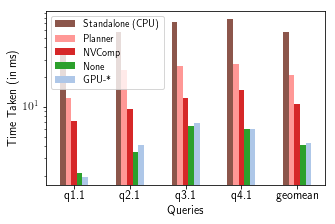

In [4]:
# Query Performance
import pandas as pd
import json

data = {}

# queries = ['q11','q12','q13','q21','q22','q23','q31','q32','q33','q34','q41','q42','q43']
queries = ['q11','q21','q31','q41']

times = []
times_inc = []

# # Standalone CPU Results
loc = "logs/ssb/20/"
cpu_runtimes = []
for query in queries:
    logs = open(loc + query + 'cpu').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    cpu_runtimes.append(runtime)

gm = geo_mean(cpu_runtimes)
cpu_runtimes.append(gm)
data['Standalone (CPU)'] = cpu_runtimes

# Standalone GPU Results
loc = "logs/ssb/20/"
crystal_runtimes = []
for query in queries:
    logs = open(loc + query).readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    crystal_runtimes.append(runtime)

gm = geo_mean(crystal_runtimes)
crystal_runtimes.append(gm)
data['None'] = crystal_runtimes

#NVComp Result
loc = "logs/ssb/20/"
nvcomp_runtimes = []
for query in queries:
    logs = open(loc + query).readlines()
    all_runs = [float(json.loads(line)['time_query_nvcomp']) for line in logs if 'time_query_nvcomp' in line]
    runtime = min(all_runs)
    nvcomp_runtimes.append(runtime)

gm = geo_mean(nvcomp_runtimes)
nvcomp_runtimes.append(gm)
data['NVComp'] = nvcomp_runtimes

loc = "logs/ssb/20/"
bin_runtimes = []
for query in queries:
    logs = open(loc + query + 'e').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    bin_runtimes.append(runtime)

gm = geo_mean(bin_runtimes)
bin_runtimes.append(gm)
data['GPU-FOR'] = bin_runtimes


loc = "logs/ssb/20/"
dbin_runtimes = []
for query in queries:
    logs = open(loc + query + 'd').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    dbin_runtimes.append(runtime)

gm = geo_mean(dbin_runtimes)
dbin_runtimes.append(gm)
data['GPU-DFOR'] = dbin_runtimes

loc = "logs/ssb/20/"
bin_runtimes = []
for query in queries:
    logs = open(loc + query + 'e').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    bin_runtimes.append(runtime)

gm = geo_mean(bin_runtimes)
bin_runtimes.append(gm)
data['GPU-*'] = bin_runtimes


loc = "logs/ssb/20/"
fn_runtimes = []
for query in queries:
    logs = open(loc + query + 'fn').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    fn_runtimes.append(runtime)

gm = geo_mean(fn_runtimes)
fn_runtimes.append(gm)
data['FOR+NSF'] = fn_runtimes

loc = "logs/ssb/20/"
dfn_runtimes = []
for query in queries:
    logs = open(loc + query + 'dfn').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    dfn_runtimes.append(runtime)

gm = geo_mean(dfn_runtimes)
dfn_runtimes.append(gm)
data['Delta+FOR+NSF'] = dfn_runtimes

loc = "logs/ssb/20/"
base_runtimes = []
for query in queries:
    logs = open(loc + query + 'base').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    base_runtimes.append(runtime)

gm = geo_mean(base_runtimes)
base_runtimes.append(gm)
data['Planner'] = base_runtimes

# df = pd.DataFrame(data, index=['q1.1','q1.2','q1.3','q2.1','q2.2','q2.3','q3.1','q3.2','q3.3','q3.4','q4.1','q4.2','q4.3', 'geomean'])

df = pd.DataFrame(data, index=['q1.1','q2.1','q3.1','q4.1', 'geomean'])

# df['None+Crystal'] = df['Crystal']
# df['NSF+Crystal'] = df['Crystal']
# # TODO: We will likely have a small saving from smaller column size
# df['NSF+Crystal'] = [0.95*x for x in df['NSF+Crystal']]
# df['NSF+Crystal'][0] = df['NSF+Crystal'][1] * 0.8
# df['NSF+Crystal'][1] = df['NSF+Crystal'][1] * 0.8
# df['NSF+Crystal'][2] = df['NSF+Crystal'][1] * 0.8

df = df[['Standalone (CPU)', 'Planner', 'NVComp', 'None', 'GPU-*']]

print(df)

#plt.style.use('ggplot')
my_colors = list(islice(cycle([tableau20[10], tableau20[7], tableau20[6], tableau20[4], tableau20[1], tableau20[2], 'k']), None, len(df)))
plt.rcParams["figure.figsize"] = (5,3.2)
fig, ax = plt.subplots()
ax.set_yscale('log')
# ax.set_ylim(0,40)
df.plot(kind='bar', ax = ax, color=my_colors, rot=0, fontsize=12)
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=0)

ax.set_xlabel('Queries', fontsize=12)
ax.set_ylabel('Time Taken (in ms)', fontsize=12)

plt.savefig('endtoend4.pdf', bbox_inches='tight')

[7.2369, 7.32714, 7.39642, 7.47197, 7.55053, 7.6328, 7.7129, 7.78598, 7.86003, 7.93238, 8.00707, 8.07456, 8.14624, 8.21603, 8.29165]
[1.66166, 1.73408, 1.80451, 1.87334, 1.94326, 2.02906, 2.09779, 2.17363, 2.25302, 2.3271, 2.4, 2.47546, 2.5495, 2.62442, 2.69578]
[4.47254, 4.60691, 4.6752, 4.74637, 4.82125, 4.90669, 4.98016, 5.06496, 5.1384, 5.21283, 5.28333, 5.35373, 5.42112, 5.48976, 5.56176]


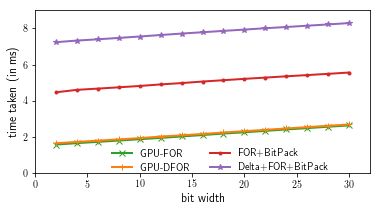

In [6]:
# SELECT
l = [[],[],[],[],[],[],[],[],[]]

fig, ax = plt.subplots()
loc = "logs/bench/"

plt.rcParams["figure.figsize"] = (5,3)

data_bins = []
for val in range(2,31,2):
    logs = open(loc + str(val) + 'binsingle').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_bins.append(runtime)

data_dbins = []
for val in range(2,31,2):
    logs = open(loc + str(val) + 'dbinsingle').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_dbins.append(runtime)
    
data_binm = []
for val in range(2,31,2):
    logs = open(loc + str(val) + 'binmulti').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_binm.append(runtime)

data_dbinm = []
for val in range(2,31,2):
    logs = open(loc + str(val) + 'dbinmulti').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_dbinm.append(runtime)
    
print(data_dbinm)
print(data_dbins)
print(data_binm)
# print(data_bin)
    
x = range(2,31,2)
# data_original = [2.5] * len(x)

# ax.plot(x, data_original, '.-', color=tableau20[6], label='None', linewidth=2)
# ax.plot(x, data_ns, '*-', color=tableau20[8], label='NSF', linewidth=2)

ax.plot(x, data_bins, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
ax.plot(x, data_dbins, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)
ax.plot(x, data_binm, '.-', color=tableau20[6], label='FOR+BitPack', linewidth=2)
ax.plot(x, data_dbinm, '*-', color=tableau20[8], label='Delta+FOR+BitPack', linewidth=2)

# ax.plot(x, l[3], '<-', color=tableau20[6], label='CPU SIMDPred', linewidth=2)

plt.legend(fontsize=10, bbox_to_anchor=(0.9, 0.2), frameon=False, ncol=2)

ax.set_ylabel('time taken (in ms)', fontsize=12)
ax.set_xlabel('bit width', fontsize=12)
ax.set_xlim(0, 32)
ax.set_ylim(0, 9)
#ax.set_title('Select D from T WHERE D > x | len = 2^28', fontsize=10)

plt.savefig('tilevscascade2.pdf', bbox_inches='tight')

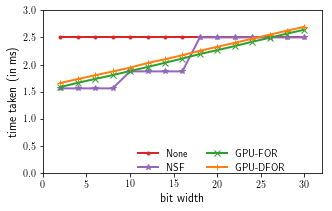

In [5]:
# SELECT
l = [[],[],[],[],[],[],[],[],[]]

fig, ax = plt.subplots()
loc = "logs/bench/"

plt.rcParams["figure.figsize"] = (6,3)

data_bins = []
for val in range(2,31,2):
    logs = open(loc + str(val) + 'binsingle').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_bins.append(runtime)

data_dbins = []
for val in range(2,31,2):
    logs = open(loc + str(val) + 'dbinsingle').readlines()
    all_runs = [float(json.loads(line)['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_dbins.append(runtime)

x = range(2,31,2)
data_original = [2.5] * len(x)
data_ns = []
for val in range(2,31,2):
    if val <= 8:
        data_ns.append(1.25 + 1.25/4)
    elif val <= 16:
        data_ns.append(1.25 + 1.25/2)
    else:
        data_ns.append(1.25 + 1.25)

ax.plot(x, data_original, '.-', color=tableau20[6], label='None', linewidth=2)
ax.plot(x, data_ns, '*-', color=tableau20[8], label='NSF', linewidth=2)

ax.plot(x, data_bins, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
ax.plot(x, data_dbins, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)

# ax.plot(x, l[3], '<-', color=tableau20[6], label='CPU SIMDPred', linewidth=2)

plt.legend(fontsize=10, bbox_to_anchor=(0.9, 0.2), frameon=False, ncol=2)

ax.set_ylabel('time taken (in ms)', fontsize=12)
ax.set_xlabel('bit width', fontsize=12)
ax.set_xlim(0, 32)
ax.set_ylim(0, 3)
#ax.set_title('Select D from T WHERE D > x | len = 2^28', fontsize=10)

plt.savefig('decompression_speed.pdf', bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(2, 3)
loc = "../logs/mapmaker/test/"

plt.rcParams["figure.figsize"] = (14,6.2)

filesizes = """testd1_2, 58720276, 60817428
testd1_4, 58720276, 60817428
testd1_6, 58720276, 60817428
testd1_8, 58720276, 60817428
testd1_10, 58720276, 60817428
testd1_12, 58720276, 60817428
testd1_14, 58720276, 60817428
testd1_16, 58720276, 60817428
testd1_18, 58720276, 60817428
testd1_20, 58720276, 60817428
testd1_22, 58720276, 60817428
testd1_24, 125829140, 60817428
testd1_26, 192938004, 60817428
testd1_28, 260046868, 60817428
testd2_6, 260689412, 291088292
testd2_8, 261179412, 291145924
testd2_10, 261179412, 291145924
testd2_12, 261179412, 291145924
testd2_14, 261179412, 291145924
testd2_16, 261179412, 291145924
testd2_18, 261179412, 291145924
testd2_20, 261179412, 291145924
testd2_22, 261179412, 291145924
testd2_24, 261179412, 291145924
testd2_26, 261179412, 291145924
testd2_28, 261179412, 291145924
testd2_30, 261179412, 291145924
testd3_1, 696254484, 731906068
testd3_2, 281640980, 316317716
testd3_3, 148488212, 182288404
testd3_4, 103391252, 137723924
testd3_5, 77697044, 112402452""".split('\n')

nsfsizes = """testd1_2,4,8
testd1_4,16,8
testd1_6,64,8
testd1_8,256,16
testd1_10,1024,16
testd1_12,4096,16
testd1_14,16384,16
testd1_16,65536,32
testd1_18,262144,32
testd1_20,1048576,32
testd1_22,4194304,32
testd1_24,16777216,32
testd1_26,67108864,32
testd1_28,268435456,32
testd2_6,182,8
testd2_8,374,16
testd2_10,1142,16
testd2_12,4214,16
testd2_14,16502,16
testd2_16,65654,32
testd2_18,262262,32
testd2_20,1048694,32
testd2_22,4194422,32
testd2_24,16777334,32
testd2_26,67108982,32
testd2_28,268435574,32
testd2_30,1073741942,32
testd3_1,1048575,32
testd3_2,309332,32
testd3_3,481,16
testd3_4,59,8
testd3_5,24,8""".split('\n')

def gen_runtimes(bitsizes):
    runtimes = []
    for val in bitsizes:
        if val <= 8:
            runtimes.append(1.4/4)
        elif val <= 16:
            runtimes.append(1.3/2)
        else:
            runtimes.append(1.25)
    return runtimes


def gen_runtimes2(bitsizes):
    runtimes = []
    for val in bitsizes:
        if val <= 8:
            runtimes.append(1.25 + 1.25/4)
        elif val <= 16:
            runtimes.append(1.25 + 1.25/2)
        else:
            runtimes.append(1.25 + 1.25)
    return runtimes


# For Distribution D1
distribution = 'd1'
r = range(2,30,2)
index = 0
xtitle = 'unique count'
ytitle = 'Distribution D1'

x1 = [2**x for x in r]

l = 1<<28

sizes = [line for line in filesizes if distribution in line]
bitsizes = [line for line in nsfsizes if distribution in line]

ds_original = [32] * len(x1)
ds_ns = [float(line.split(',')[2]) for line in bitsizes]
ds_bin = [(float(line.split(',')[1]) * 8) / l for line in sizes ]
ds_dbin = [(float(line.split(',')[2]) * 8) / l for line in sizes ]

data_original = [1.25] * len(x1)
data_ns = gen_runtimes(ds_ns)

data_original_m = [2.5] * len(x1)
data_ns_m = gen_runtimes2(ds_ns)

data_bin = []
for val in r:
    logs = open(loc + 'perf_bin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_bin.append(runtime)

data_dbin = []
for val in r:
    logs = open(loc + 'perf_dbin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_dbin.append(runtime)

data_bin_m = []
for val in r:
    logs = open(loc + 'match_bin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_bin_m.append(runtime)

data_dbin_m = []
for val in r:
    logs = open(loc + 'match_dbin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_dbin_m.append(runtime)
    
axs[0,0].set_xscale('log', basex=2)
#axs[index,1].set_xscale('log', basex=2)
axs[1,0].set_xscale('log', basex=2)

ds_rle = [0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3389830508474576,
 1.059322033898305,
 4.067796610169491,
 16.14406779661017]
rle_color = (227/255.,117/255.,195/255.)

axs[0,0].plot(x1, ds_original, '.-', color=tableau20[6], label='None', linewidth=2)
axs[0,0].plot(x1, ds_ns, '*-', color=tableau20[8], label='NSF', linewidth=2)
axs[0,0].plot(x1, ds_bin, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
axs[0,0].plot(x1, ds_dbin, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)
axs[0,0].plot(x1[:-1], ds_rle, 'v-', color=rle_color, label='RLE', linewidth=2)

print('1_ds_bin', ds_bin)
print('1_ds_dbin', ds_dbin)

# axs[index,1].plot(x1, data_original, '.-', color=tableau20[6], label='None', linewidth=2)
# axs[index,1].plot(x1, data_ns, '*-', color=tableau20[8], label='NSF', linewidth=2)
# axs[index,1].plot(x1, data_bin, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
# axs[index,1].plot(x1, data_dbin, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)

data_rle_m = [5.008474576271187,
 5.008474576271187,
 5.008474576271187,
 5.008474576271187,
 5.008474576271187,
 5.008474576271187,
 5.008474576271187,
 5.0508474576271185,
 5.186440677966102,
 5.6440677966101696,
 6.262711864406779,
 6.338983050847458,
 6.593220338983051]

axs[1,0].plot(x1, data_original_m, '.-', color=tableau20[6], label='None', linewidth=2)
axs[1,0].plot(x1, data_ns_m, '*-', color=tableau20[8], label='NSF', linewidth=2)
axs[1,0].plot(x1, data_bin_m, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
axs[1,0].plot(x1, data_dbin_m, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)
axs[1,0].plot(x1[:-1], data_rle_m, 'v-', color=rle_color, label='RLE', linewidth=2)

axs[0,0].set_title('(a) compression rate')
#axs[index,1].set_title('(b) aggregation time')
axs[1,0].set_title('(b) decompression time')

axs[0,0].set_ylim(0, 35)
#axs[index,1].set_ylim(0, 2.5)
axs[1,0].set_ylim(0, 7)

# axs[index,0].set_ylabel(ytitle, fontsize=14)
axs[0,0].set_ylabel('bits per int', fontsize=11)
#axs[index,1].set_ylabel('time taken (in ms)', fontsize=11)
axs[1,0].set_ylabel('time taken (in ms)', fontsize=11)

axs[0,0].set_xlabel(xtitle, fontsize=11)
#axs[index,1].set_xlabel(xtitle, fontsize=11)
axs[1,0].set_xlabel(xtitle, fontsize=11)

# axs[index,0].text(-0.13, 0.5, 'Distribution D1',
#         horizontalalignment='right',
#         verticalalignment='center',
#         rotation='vertical',
#         transform=axs[index,0].transAxes, fontsize=14)

axs[1,0].text(2**15, -1*7/3.0, 'Distribution D1', fontsize=14, horizontalalignment='center')

# For Distribution D2
distribution = 'd2'
r = range(6,32,2)
index = 1
xtitle = 'mean'
ytitle = 'Distribution D2'

x1 = [2**x for x in r]

l = 1<<28

sizes = [line for line in filesizes if distribution in line]
bitsizes = [line for line in nsfsizes if distribution in line]

ds_original = [32] * len(x1)
ds_ns = [float(line.split(',')[2]) for line in bitsizes]
ds_bin = [(float(line.split(',')[1]) * 8) / l for line in sizes ]
ds_dbin = [(float(line.split(',')[2]) * 8) / l for line in sizes ]

data_original = [1.25] * len(x1)
data_ns = gen_runtimes(ds_ns)

data_original_m = [2.5] * len(x1)
data_ns_m = gen_runtimes2(ds_ns)

data_bin = []
for val in r:
    logs = open(loc + 'perf_bin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_bin.append(runtime)

data_dbin = []
for val in r:
    logs = open(loc + 'perf_dbin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_dbin.append(runtime)

data_bin_m = []
for val in r:
    logs = open(loc + 'match_bin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_bin_m.append(runtime)

data_dbin_m = []
for val in r:
    logs = open(loc + 'match_dbin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_dbin_m.append(runtime)
    
axs[0,1].set_xscale('log', basex=2)
#axs[index,1].set_xscale('log', basex=2)
axs[1,1].set_xscale('log', basex=2)

axs[0,1].plot(x1, ds_original, '.-', color=tableau20[6], label='None', linewidth=2)
axs[0,1].plot(x1, ds_ns, '*-', color=tableau20[8], label='NSF', linewidth=2)
axs[0,1].plot(x1, ds_bin, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
axs[0,1].plot(x1, ds_dbin, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)

# axs[0,1].plot(x1, data_original, '.-', color=tableau20[6], label='None', linewidth=2)
# axs[index,1].plot(x1, data_ns, '*-', color=tableau20[8], label='NSF', linewidth=2)
# axs[index,1].plot(x1, data_bin, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
# axs[index,1].plot(x1, data_dbin, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)

axs[1,1].plot(x1, data_original_m, '.-', color=tableau20[6], label='None', linewidth=2)
axs[1,1].plot(x1, data_ns_m, '*-', color=tableau20[8], label='NSF', linewidth=2)
axs[1,1].plot(x1, data_bin_m, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
axs[1,1].plot(x1, data_dbin_m, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)

axs[0,1].set_title('(c) compression rate')
# axs[index,1].set_title('(e) aggregation time')
axs[1,1].set_title('(d) decompression time')

axs[0,1].set_ylim(0, 35)
# axs[index,1].set_ylim(0, 2.5)
axs[1,1].set_ylim(0, 3)
# axs[index,0].set_xticks(x1)
# axs[index,1].set_xticks(x1)
# axs[index,2].set_xticks(x1)

# axs[index,0].set_ylabel(ytitle, fontsize=14)
axs[0,1].set_ylabel('bits per int', fontsize=11)
# axs[index,1].set_ylabel('time taken (in ms)', fontsize=11)
axs[1,1].set_ylabel('time taken (in ms)', fontsize=11)

axs[0,1].set_xlabel(xtitle, fontsize=11)
# axs[index,1].set_xlabel(xtitle, fontsize=11)
axs[1,1].set_xlabel(xtitle, fontsize=11)

# axs[index,0].text(-0.13, 0.5, 'Distribution D2',
#         horizontalalignment='right',
#         verticalalignment='center',
#         rotation='vertical',
#         transform=axs[index,0].transAxes, fontsize=14)

axs[1,1].text(2**18, -1, 'Distribution D2', fontsize=14, horizontalalignment='center')

# For Distribution D3
distribution = 'd3'
r = range(1,6,1)
index = 2
xtitle = 'alpha'
ytitle = 'Distribution D3'

x1 = [x for x in r]

l = 1<<28

sizes = [line for line in filesizes if distribution in line]
bitsizes = [line for line in nsfsizes if distribution in line]

ds_original = [32] * len(x1)
ds_ns = [float(line.split(',')[2]) for line in bitsizes]
ds_bin = [(float(line.split(',')[1]) * 8) / l for line in sizes ]
ds_dbin = [(float(line.split(',')[2]) * 8) / l for line in sizes ]

data_original = [1.25] * len(x1)
data_ns = gen_runtimes(ds_ns)

data_original_m = [2.5] * len(x1)
data_ns_m = gen_runtimes2(ds_ns)

data_bin = []
for val in r:
    logs = open(loc + 'perf_bin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_bin.append(runtime)

data_dbin = []
for val in r:
    logs = open(loc + 'perf_dbin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_dbin.append(runtime)

data_bin_m = []
for val in r:
    logs = open(loc + 'match_bin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_bin_m.append(runtime)

data_dbin_m = []
for val in r:
    logs = open(loc + 'match_dbin_' + distribution + '_' + str(val)).readlines()
    all_runs = [float(json.loads(line.replace('ms',''))['time_query']) for line in logs if 'time_query' in line]
    runtime = min(all_runs)
    data_dbin_m.append(runtime)
    
#axs[index,0].set_xscale('log')
#axs[index,1].set_xscale('log')
#axs[index,2].set_xscale('log')

ds_nsv = [19.03061224489796, 10.0, 10.0, 10.0, 10.0]
data_nsv_m = [4.5036496350364965, 4.160583941605839, 4.160583941605839, 4.160583941605839, 4.16]
nsv_color = (141/255.,86/255.,77/255.)

axs[0,2].plot(x1, ds_original, '.-', color=tableau20[6], label='None', linewidth=2)
axs[0,2].plot(x1, ds_ns, '*-', color=tableau20[8], label='NSF', linewidth=2)
axs[0,2].plot(x1, ds_nsv, '^-', color=nsv_color, label='NSV', linewidth=2)
axs[0,2].plot(x1, ds_bin, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
axs[0,2].plot(x1, ds_dbin, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)

# axs[index,1].plot(x1, data_original, '.-', color=tableau20[6], label='None', linewidth=2)
# axs[index,1].plot(x1, data_ns, '*-', color=tableau20[8], label='NSF', linewidth=2)
# axs[index,1].plot(x1, data_bin, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
# axs[index,1].plot(x1, data_dbin, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)

axs[1,2].plot(x1, data_original_m, '.-', color=tableau20[6], label='None', linewidth=2)
axs[1,2].plot(x1, data_ns_m, '*-', color=tableau20[8], label='NSF', linewidth=2)
axs[1,2].plot(x1, data_nsv_m, '^-', color=nsv_color, label='NSV', linewidth=2)
axs[1,2].plot(x1, data_bin_m, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
axs[1,2].plot(x1, data_dbin_m, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)

axs[0,2].set_title('(e) compression rate')
# axs[index,1].set_title('(h) aggregation time')
axs[1,2].set_title('(f) decompression time')

axs[0,2].set_ylim(0, 35)
# axs[index,1].set_ylim(0, 2.5)
axs[1,2].set_ylim(0, 5)
axs[0,2].set_xticks(r)
# axs[index,1].set_xticks(r)
axs[1,2].set_xticks(r)

axs[0,2].set_ylabel('bits per int', fontsize=11)
# axs[index,0].set_ylabel(r'{\fontsize{14pt}{1em}\selectfont{}{Distribution D3}}\\{\fontsize{12pt}{1em}\selectfont{}{bits per int}}')
# axs[index,1].set_ylabel('time taken (in ms)', fontsize=11)
axs[1,2].set_ylabel('time taken (in ms)', fontsize=11)

axs[1,2].text(3, -1, 'Distribution D3', fontsize=14, horizontalalignment='center')

axs[0,2].set_xlabel(xtitle, fontsize=11)
#axs[index,1].set_xlabel(xtitle, fontsize=11)
axs[1,2].set_xlabel(xtitle, fontsize=11)



handles, labels = axs[1,2].get_legend_handles_labels()

handles2, labels2 = axs[0,0].get_legend_handles_labels()
handles.append(handles2[-1])
labels.append(labels2[-1])

# fig.legend(handles, labels, loc='upper center')
fig.legend(handles, labels, ncol=6, bbox_to_anchor=(0.8, 1.04),fontsize=12)


plt.tight_layout()
plt.savefig('varying_dist.pdf', bbox_inches='tight')

           Column       None     Planner      NVComp     GPU-FOR    GPU-DFOR  \
0        orderkey  479.98308   89.999255   24.770100  124.008436   85.505476   
1       orderdate  479.98308  119.949092   75.275196  176.242283  193.116544   
2         custkey  479.98308  179.998046   90.271540  307.331857  315.474472   
3         partkey  479.98308  363.734074  301.978016  308.420609  319.534880   
4         suppkey  479.98308  243.739328  241.980832  248.423937  264.478504   
5      linenumber  479.98308  123.744582   46.931392   53.434753   59.997556   
6      commitdate  479.98308  243.739328  241.980832  176.175228  193.116544   
7        quantity  479.98308  119.994746   91.987872   98.432257  132.149316   
8             tax  479.98308  119.994746   61.989280   68.433921   74.996768   
9        discount  479.98308  119.994746   61.989280   68.433921   88.330076   
10  extendedprice  479.98308  479.983080  361.975200  367.925761  388.072280   
11  ordtotalprice  479.98308  179.998496

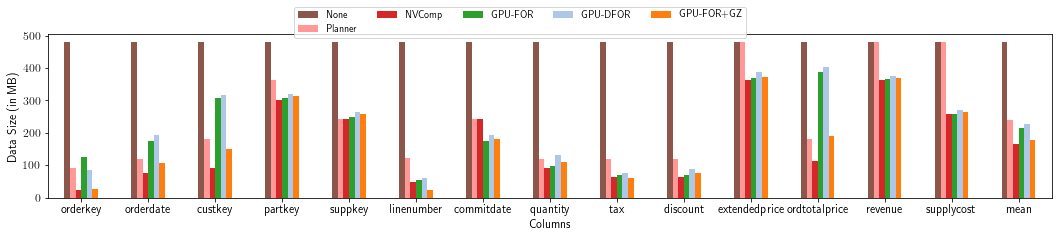

In [7]:
import json
import io

data = {}

old_data = """column, original, dict+bin, dict+bin+delta, dict+bin+delta+gz
lo_orderkey, 24004684, 5217092, 4090412, 1857162
lo_custkey, 24004684, 11618740, 12490816, 8867306
lo_partkey, 24004684, 13877772, 14813068, 13699005
lo_suppkey, 24004684, 8626736, 9564544, 8397375
lo_orderdate, 24004684, 12365204, 13283136, 4544945
lo_quantity, 24004684, 4875996, 5812152, 4556452
lo_extendedprice, 24004684, 18061460, 18611080, 17943009
lo_discount, 24004684, 3374428, 4230288, 2699557"""

data = """
lo_orderkey, 479983080, 108076920, 85505476, 26192700
lo_linenumber, 479983080, 55760540, 59997556, 21923472
lo_custkey, 479983080, 304726504, 315474472, 149804495
lo_partkey, 479983080, 310958808, 319534880, 315065267
lo_suppkey, 479983080, 251201684, 264478504, 259318571
lo_orderdate, 479983080, 250989436, 269345996, 150331587
lo_quantity, 479983080, 101245020, 119961104, 108532590
lo_extendedprice, 479983080, 364868540, 375877204, 371712419
lo_ordtotalprice, 479983080, 388189576, 403404644, 189701722
lo_discount, 479983080, 71222536, 88330076, 75533477
lo_revenue, 479983080, 361860692, 375277088, 370844697
lo_supplycost, 479983080, 255194224, 269994912, 264493608
lo_tax, 479983080, 56247404, 74996768, 60179062
lo_commitdate, 479983080, 251070924, 269375340, 258964431"""
data = """Column, NONE, DICT|BIN, DICT|DELTA|BIN, DICT|DELTA|BIN|GZ
orderkey, 479983080, 124008436, 85505476, 26192700
linenumber, 479983080, 56247540, 59997556, 21923472
custkey, 479983080, 310144644, 315474472, 149804495
partkey, 479983080, 311233396, 319534880, 315065267
suppkey, 479983080, 251236724, 264478504, 259318571
orderdate, 479983080, 251236724, 269345996, 150331587
quantity, 479983080, 101245044, 132149316, 108532590
extendedprice, 479983080, 370738548, 388072280, 371712419
ordtotalprice, 479983080, 392279028, 403404644, 189701722
discount, 479983080, 71246708, 88330076, 75533477
revenue, 479983080, 368937204, 375277088, 370844697
supplycost, 479983080, 260639588, 269994912, 264493608
tax, 479983080, 71246708, 74996768, 60179062
commitdate, 479983080, 251236724, 269375340, 258964431
"""
data = """Column,None,GPU-FOR,FOR+NS,FOR+NSV,GPU-DFOR,Delta+FOR+NS,Delta+FOR+NSV
lo\_orderkey, 479983080, 124008436, 123744582, 149993433, 87183348, 123744585, 149993432
lo\_partkey, 479983080, 311233396, 363734074, 374952653, 322238292, 363734075, 385926322
lo\_orderdate, 479983080, 251236724, 243739328, 262479532, 267154180, 363734075, 278606797
lo\_discount, 479983080, 71246708, 123744582, 149993433, 87179908, 123744585, 149993432
"""

data = """Column,None,GPU-FOR,GPU-DFOR,GPU-FOR+GZ,Planner,NVComp
orderkey, 479983080, 124008436, 85505476, 26192700, 89999255, 24770100
orderdate, 479983080, 176242283, 193116544, 105457441, 119949092, 75275196
custkey, 479983080, 307331857, 315474472, 149804495, 179998046, 90271540
partkey, 479983080, 308420609, 319534880, 315065267, 363734074, 301978016
suppkey, 479983080, 248423937, 264478504, 259318571, 243739328, 241980832
linenumber, 479983080, 53434753, 59997556, 21923472, 123744582, 46931392
commitdate, 479983080, 176175228, 193116544, 181088481, 243739328, 241980832
quantity, 479983080, 98432257, 132149316, 108532590, 119994746, 91987872
tax, 479983080, 68433921, 74996768, 60179062, 119994746, 61989280
discount, 479983080, 68433921, 88330076, 75533477, 119994746, 61989280
extendedprice, 479983080, 367925761, 388072280, 371712419, 479983080, 361975200
ordtotalprice, 479983080, 389466241, 403404644, 189701722, 179998496, 112834628
revenue, 479983080, 366124417, 375277088, 370844697, 479983080, 361975200
supplycost, 479983080, 257826801, 269994912, 264493608, 479983080, 256980000
"""


# data = """Column,None,GPU-FOR,GPU-DFOR,FOR+NSV,Delta+FOR+NSV,Baseline
# orderkey, 479983080, 124008436, 85505476, 149993433, 149993432, 52498030
# linenumber, 479983080, 56247540, 59997556, 149993433, 149993432, 119994746
# custkey, 479983080, 310144644, 315474472, 369432488, 387189101, 179998046
# partkey, 479983080, 311233396, 319534880, 374952653, 385926322, 359984238
# suppkey, 479983080, 251236724, 264478504, 268283438, 273019470, 239989492
# orderdate, 479983080, 251236724, 269345996, 262479532, 278606797, 179923640
# quantity, 479983080, 101245044, 132149316, 149993433, 149993432, 119994746
# extendedprice, 479983080, 370738548, 388072280, 386677059, 388286579, 359984238
# ordtotalprice, 479983080, 392279028, 403404644, 479983080, 479983080, 479983080
# discount, 479983080, 71246708, 88330076, 149993433, 149993432, 119994746
# revenue, 479983080, 368937204, 375277088, 386614264, 388113157, 359984238
# supplycost, 479983080, 260639588, 269994912, 270136713, 312006079, 359984238
# tax, 479983080, 71246708, 74996768, 149993433, 149993432, 119994746
# commitdate, 479983080, 251236724, 269375340, 263348502, 279582159, 239989492
# """

fixedns = """479977472
119994368
479977472
479977472
239988736
479977472
479977472
119994368
479977472
119994368
479977472
479977472
119994368
479977472"""

#TODO
#Add Just dict

df = pd.read_csv(io.StringIO(data))
# df['NSF'] = [int(x) for x in fixedns.split()]
# df = df[['Column','None', 'GPU-FOR', 'FOR+NS', 'FOR+NSV', 'GPU-DFOR', 'Delta+FOR+NS', 'Delta+FOR+NSV']]

# df = df[['Column','None', 'GPU-FOR', 'GPU-DFOR', 'FOR+NSV', 'Delta+FOR+NSV', 'Baseline']]

df = df[['Column','None', 'Planner', 'NVComp', 'GPU-FOR', 'GPU-DFOR', 'GPU-FOR+GZ']]

for col in df.columns.tolist():
    if col == 'Column':
        continue
    else:
        df[col] = [x/1000000 for x in df[col]]
        
print(df)

df2 = df.mean(axis = 0)
df2['Column'] = 'mean'

print(df2)

df = df.append(df2, ignore_index = True)

print(df)


# df.set_index('Column')

# for col in df['Column']:
#     print(col)

# print(sum(df['NSF']), sum(df['GPU-FOR']), sum(df['None']), sum(df['GPU-FOR+GZ']))
#my_colors = list(islice(cycle([tableau20[7], tableau20[6], tableau20[4], tableau20[10], tableau20[13], 'k']), None, len(df)))
my_colors = list(islice(cycle([tableau20[10], tableau20[7], tableau20[6], tableau20[4], tableau20[1], tableau20[2], 'k']), None, len(df)))

# my_colors = list(islice(cycle([tableau20[10], tableau20[7], tableau20[4], tableau20[1], 'k']), None, len(df)))



plt.rcParams["figure.figsize"] = (18,3)
fig, ax = plt.subplots()
df.set_index('Column').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=5, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Data Size (in MB)", fontsize=12)
ax.set_xlabel("Columns", fontsize=12)

plt.savefig('endtoendsize2.pdf', bbox_inches='tight')

[2.75, 4.75, 6.75, 8.75, 10.75, 12.75, 14.75, 16.75, 18.75, 20.75, 22.75, 24.75, 26.75, 28.75, 30.75]
[3.875, 5.875, 7.875, 9.875, 11.875, 13.875, 15.875, 17.875, 19.875, 21.875, 23.875, 25.875, 27.875, 29.875, 31.875]


(0, 32)

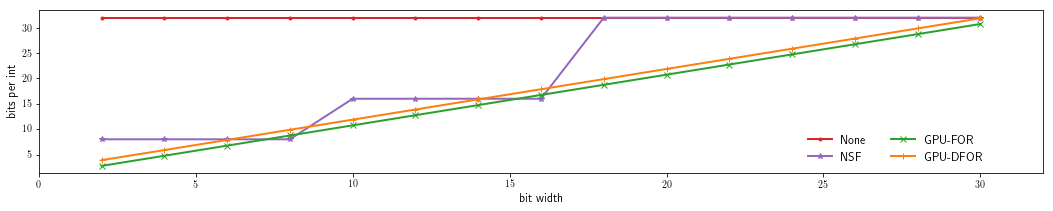

In [8]:
l = [[],[],[],[],[],[],[],[],[]]

fig, ax = plt.subplots()

x = range(2,31,2)
data_bin = []
data_dbin = []
data_original = []
data_ns = []

for val in x:
    if val <= 8:
        data_ns.append(8)
    elif val <= 16:
        data_ns.append(16)
    else:
        data_ns.append(32)
    data_original.append(32)
    data_bin.append(val + 0.75)
    data_dbin.append(val + 1 + 0.75 + 32/256.0)
    
print(data_bin)
print(data_dbin)

ax.plot(x, data_original, '.-', color=tableau20[6], label='None', linewidth=2)
ax.plot(x, data_ns, '*-', color=tableau20[8], label='NSF', linewidth=2)
ax.plot(x, data_bin, 'x-', color=tableau20[4], label='GPU-FOR', linewidth=2)
ax.plot(x, data_dbin, '+-', color=tableau20[2], label='GPU-DFOR', linewidth=2)

plt.legend(fontsize=12, bbox_to_anchor=(0.95, 0.3), frameon=False, ncol=2)



ax.set_ylabel('bits per int', fontsize=12)
ax.set_xlabel('bit width', fontsize=12)
ax.set_xlim(0, 32)
#ax.set_ylim(0, 138)
#ax.set_title('Select D from T WHERE D > x | len = 2^28', fontsize=10)
# plt.savefig('compression_ratio.pdf', bbox_inches='tight')

     Columns  Semantic-aware  LFU(Fine-grain)  LRU(Fine-grain)  LFU  LRU
0    suppkey            1.00            1.000             0.00    1    0
1    custkey            0.90            0.020             0.00    0    0
2    partkey            0.24            0.000             0.08    0    0
3  orderdate            0.00            1.000             1.00    1    1
4    revenue            0.00            0.258             1.00    0    1
     Columns  LFU  LFU(Fine-grain)  Semantic-aware
0    suppkey    1            1.000            1.00
1    custkey    0            0.020            0.90
2    partkey    0            0.000            0.24
3  orderdate    1            1.000            0.00
4    revenue    0            0.258            0.00


Text(0.5,0,'Columns')

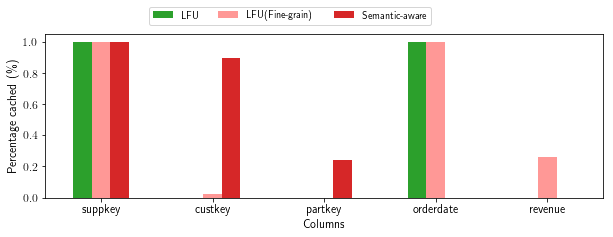

In [10]:
import json
import io

data = {}


data = """Columns,Semantic-aware,LFU(Fine-grain),LRU(Fine-grain),LFU,LRU
suppkey, 1, 1, 0, 1, 0
custkey, 0.9, 0.02, 0, 0, 0
partkey, 0.24, 0, 0.08, 0, 0
orderdate, 0, 1, 1, 1, 1
revenue, 0, 0.258, 1, 0, 1
"""

df = pd.read_csv(io.StringIO(data))

print(df)

df = df[['Columns', 'LFU', 'LFU(Fine-grain)', 'Semantic-aware']]

print(df)

my_colors = list(islice(cycle([tableau20[4], tableau20[7], tableau20[6], tableau20[4], tableau20[1], tableau20[2], 'k']), None, len(df)))

plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
df.set_index('Columns').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=5, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Percentage cached (\%)", fontsize=12)
ax.set_xlabel("Columns", fontsize=12)

   Queries       LRU  LRU(Fine-grain)       LFU  LFU(Fine-grain)  \
0      Q11  0.208791         0.208791  0.208791         0.208791   
1      Q12  0.272727         0.272727  0.272727         0.272727   
2      Q13  0.272727         0.272727  0.272727         0.272727   
3      Q21  0.505400         0.524838  0.505400         0.520518   
4      Q22  0.504329         0.523810  0.504329         0.519481   
5      Q23  0.504329         0.523810  0.504329         0.519481   
6      Q31  0.506494         0.506494  0.506494         0.574970   
7      Q32  0.506494         0.506494  0.506494         0.574970   
8      Q33  0.506494         0.506494  0.506494         0.574970   
9      Q34  0.703704         0.703704  0.703704         1.000000   
10     Q41  0.340058         0.353026  0.340058         0.353026   
11     Q42  0.361823         0.361823  0.361823         0.361823   
12     Q43  0.361823         0.413105  0.361823         0.413105   

    Semantic-aware  
0         0.010989  
1    

Text(0.5,0,'Queries')

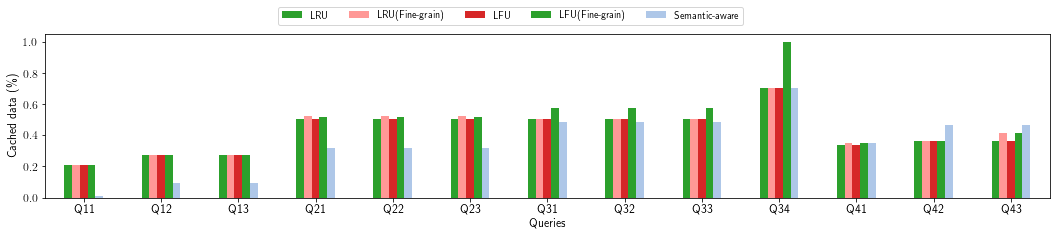

In [31]:
import json
import io

data = {}

# lfu = [50000, 50000, 28108, 28108, 18797, 18454, 5788, 5887, 5866, 3020]
# lru = [50000, 50000, 50000, 35623, 18888, 11681, 4956, 5018, 4689, 3020]
# lfuf = [40717, 21335, 11311, 6100, 5000, 4251, 3920, 3122, 3020, 3044]
# lruf = [41996, 37298, 24455, 18359, 14814, 5799, 5656, 5045, 3137, 3020]
queries = ['q11','q12','q13','q21','q22','q23','q31','q32','q33','q34','q41','q42','q43']
divisor = [182, 22, 11, 926, 924, 924, 847, 847, 847, 27, 1388, 351, 351]

# data = """Column,None,GPU-FOR,GPU-DFOR,GPU-FOR+GZ,Planner,NVComp
# orderkey, 479983080, 124008436, 85505476, 26192700, 89999255, 24770100
# orderdate, 479983080, 176242283, 193116544, 105457441, 119949092, 75275196
# custkey, 479983080, 307331857, 315474472, 149804495, 179998046, 90271540
# partkey, 479983080, 308420609, 319534880, 315065267, 363734074, 301978016
# suppkey, 479983080, 248423937, 264478504, 259318571, 243739328, 241980832
# linenumber, 479983080, 53434753, 59997556, 21923472, 123744582, 46931392
# commitdate, 479983080, 176175228, 193116544, 181088481, 243739328, 241980832
# quantity, 479983080, 98432257, 132149316, 108532590, 119994746, 91987872
# tax, 479983080, 68433921, 74996768, 60179062, 119994746, 61989280
# discount, 479983080, 68433921, 88330076, 75533477, 119994746, 61989280
# extendedprice, 479983080, 367925761, 388072280, 371712419, 479983080, 361975200
# ordtotalprice, 479983080, 389466241, 403404644, 189701722, 179998496, 112834628
# revenue, 479983080, 366124417, 375277088, 370844697, 479983080, 361975200
# supplycost, 479983080, 257826801, 269994912, 264493608, 479983080, 256980000
# """


data = """Queries,LFU,LRU,LFU(Fine-grain),LRU(Fine-grain),Semantic-aware
Q11, 38, 38, 38, 38, 2
Q12, 6, 6, 6, 6, 2
Q13, 3, 3, 3, 3, 1
Q21, 468, 468, 482, 486, 295
Q22, 466, 466, 480, 484, 293
Q23, 466, 466, 480, 484, 293
Q31, 429, 429, 487, 429, 411
Q32, 429, 429, 487, 429, 411
Q33, 429, 429, 487, 429, 411
Q34, 19, 19, 27, 19, 19
Q41, 472, 472, 490, 490, 490
Q42, 127, 127, 127, 127, 163
Q43, 127, 127, 145, 145, 163
"""

# data = """Queries, Q11, Q12, Q13, Q21, Q22, Q23, Q31, Q32, Q33, Q34, Q41, Q42, Q43
# LFU, 38, 6, 3, 468, 466, 466, 429, 429, 429, 19, 472, 127, 127
# LRU, 38, 6, 3, 468, 466, 466, 429, 429, 429, 19, 472, 127, 127
# LFU (Fine-grain), 38, 6, 3, 482, 480, 480, 487, 487, 487, 27, 490, 127, 127
# LRU (Fine-grain), 38, 6, 3, 486, 484, 484, 429, 429, 429, 19, 490, 145, 145 
# Semantic-aware, 2, 2, 1, 295, 293, 293, 411, 411, 411, 19, 490, 163, 163
# """

df = pd.read_csv(io.StringIO(data))

df = df[['Queries', 'LRU', 'LRU(Fine-grain)', 'LFU', 'LFU(Fine-grain)', 'Semantic-aware']]

df['LFU'] = df['LFU']/divisor
df['LRU'] = df['LRU']/divisor
df['LFU(Fine-grain)'] = df['LFU(Fine-grain)']/divisor
df['LRU(Fine-grain)'] = df['LRU(Fine-grain)']/divisor
df['Semantic-aware'] = df['Semantic-aware']/divisor

# df2 = df.mean(axis = 0)
# df2['Queries'] = 'mean'

# print(df2)

# df = df.append(df2, ignore_index = True)

# print(df)

print(df)

my_colors = list(islice(cycle([tableau20[10], tableau20[7], tableau20[6], tableau20[4], tableau20[1], tableau20[2], 'k']), None, len(df)))

plt.rcParams["figure.figsize"] = (18,3)
fig, ax = plt.subplots()
df.set_index('Queries').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=5, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Cached data (\%)", fontsize=12)
ax.set_xlabel("Queries", fontsize=12)


           Column  NVComp(FOR+BitPacking)  NVComp(Delta+FOR+BitPacking)  \
0        orderkey                1.101820                       1.71315   
1      linenumber                0.852992                       1.62099   
2         custkey                1.445890                       2.23846   
3         partkey                1.444860                       2.25587   
4         suppkey                1.321980                       2.11763   
5       orderdate                1.325060                       2.11866   
6   extendedprice                1.568770                       2.36442   
7        quantity                0.957440                       1.72544   
8   ordtotalprice                1.623040                       2.37261   
9        discount                0.894976                       1.70906   
10        revenue                1.566720                       2.34086   
11     supplycost                1.380350                       2.12070   
12            tax        

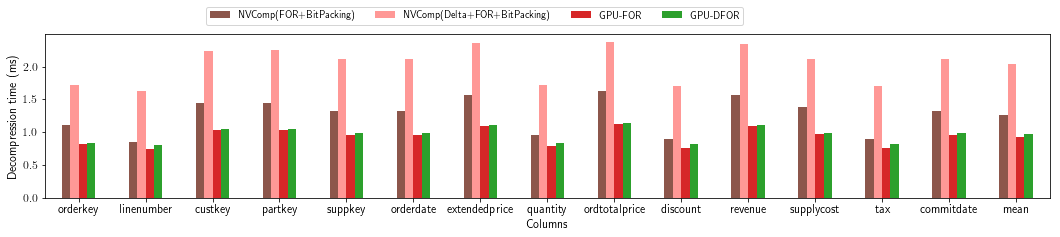

In [25]:
import json
import io

data = {}

data = """Column,NVComp(FOR+BitPacking),NVComp(Delta+FOR+BitPacking),GPU-FOR,GPU-DFOR
orderkey, 1.10182, 1.71315, 0.811552, 0.83328
linenumber, 0.852992, 1.62099, 0.736736, 0.795584
custkey, 1.44589, 2.23846, 1.02598, 1.0424
partkey, 1.44486, 2.25587, 1.02803, 1.05414
suppkey, 1.32198, 2.11763, 0.957056, 0.988448
orderdate, 1.32506, 2.11866, 0.957056, 0.992096
extendedprice, 1.56877, 2.36442, 1.09501, 1.10717
quantity, 0.95744, 1.72544, 0.789056, 0.836128
ordtotalprice, 1.62304, 2.37261, 1.11824, 1.13891
discount, 0.894976, 1.70906, 0.757216, 0.814944
revenue, 1.56672, 2.34086, 1.0935, 1.10576
supplycost, 1.38035, 2.1207, 0.969792, 0.9896
tax, 0.893952, 1.71008, 0.757664, 0.81232
commitdate, 1.31891, 2.12173, 0.957696, 0.990016
"""

df = pd.read_csv(io.StringIO(data))
print(df)
df = df[['Column','NVComp(FOR+BitPacking)', 'NVComp(Delta+FOR+BitPacking)', 'GPU-FOR', 'GPU-DFOR']]
        
print(df)

df2 = df.mean(axis = 0)
df2['Column'] = 'mean'

print(df2)

df = df.append(df2, ignore_index = True)

print(df)


my_colors = list(islice(cycle([tableau20[10], tableau20[7], tableau20[6], tableau20[4], tableau20[1], tableau20[2], 'k']), None, len(df)))

plt.rcParams["figure.figsize"] = (18,3)
fig, ax = plt.subplots()
df.set_index('Column').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=5, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Decompression time (ms)", fontsize=12)
ax.set_xlabel("Columns", fontsize=12)

plt.savefig('nvcomp.pdf', bbox_inches='tight')

Text(0.5,0,'cache size / data size')

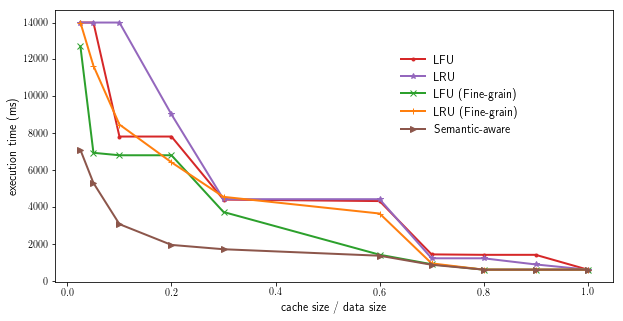

In [9]:
fig, ax = plt.subplots()

lfu = [14000, 14000, 7824, 7824, 4408, 4328, 1440, 1416, 1416, 614]
lru = [14000, 14000, 14000, 9024, 4430, 4430, 1228, 1228, 895, 614]
lfuf = [12703, 6943, 6810, 6810, 3736, 1422, 907, 614, 614, 614]
lruf = [14000, 11656, 8475, 6428, 4557, 3654, 952, 614, 614, 614]
sem = [7098, 5309, 3077, 1953, 1719, 1368, 878, 614, 614, 614]
# ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ratio = [0.025, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

ax.plot(ratio, lfu, '.-', color=tableau20[6], label='LFU', linewidth=2)
ax.plot(ratio, lru, '*-', color=tableau20[8], label='LRU', linewidth=2)
ax.plot(ratio, lfuf, 'x-', color=tableau20[4], label='LFU (Fine-grain)', linewidth=2)
ax.plot(ratio, lruf, '+-', color=tableau20[2], label='LRU (Fine-grain)', linewidth=2)
ax.plot(ratio, sem, '>-', color=tableau20[10], label='Semantic-aware', linewidth=2)

plt.legend(fontsize=12, bbox_to_anchor=(0.6, 0.5), frameon=False, ncol=1)
plt.rcParams["figure.figsize"] = (10,5)

ax.set_ylabel('execution time (ms)', fontsize=12)
ax.set_xlabel('cache size / data size', fontsize=12)

Text(0.5,0,'skew factor')

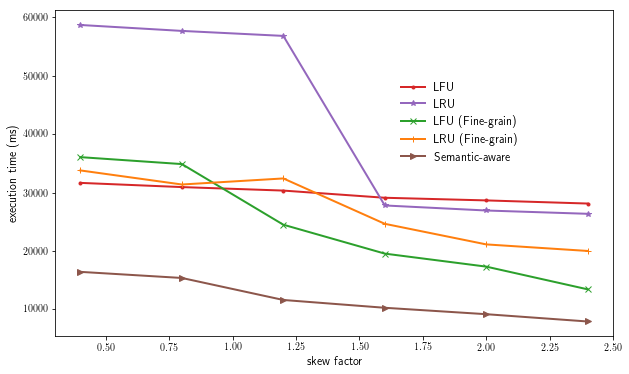

In [87]:
fig, ax = plt.subplots()

lfu = [31665, 30946, 30347, 29117, 28664, 28127]
lru = [58703, 57688, 56834, 27799, 26936, 26370]
lfuf = [36072, 34884, 24503, 19553, 17325, 13435]
lruf = [33796, 31388, 32425, 24656, 21131, 20008]
sem = [16427, 15382, 11615, 10278, 9180, 7930]
ratio = [0.4, 0.8, 1.2, 1.6, 2.0, 2.4]

ax.plot(ratio, lfu, '.-', color=tableau20[6], label='LFU', linewidth=2)
ax.plot(ratio, lru, '*-', color=tableau20[8], label='LRU', linewidth=2)
ax.plot(ratio, lfuf, 'x-', color=tableau20[4], label='LFU (Fine-grain)', linewidth=2)
ax.plot(ratio, lruf, '+-', color=tableau20[2], label='LRU (Fine-grain)', linewidth=2)
ax.plot(ratio, sem, '>-', color=tableau20[10], label='Semantic-aware', linewidth=2)

plt.legend(fontsize=12, bbox_to_anchor=(0.6, 0.5), frameon=False, ncol=1)
plt.rcParams["figure.figsize"] = (10,6)

ax.set_ylabel('execution time (ms)', fontsize=12)
ax.set_xlabel('skew factor', fontsize=12)

zipfian distribution on the date column
skew factor > the more probability of recent data being accessed
data size 4 * cache size
1000 replacement 1000 replacement r

high skew factor
query always access data in the range of 1 week - 4 year
1992 - 1998

Text(0.5,0,'cache size / data size')

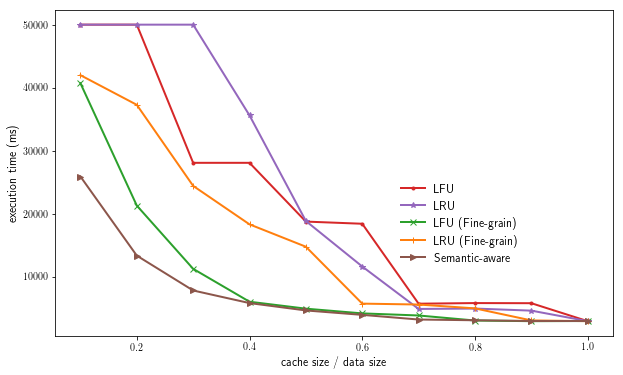

In [19]:
fig, ax = plt.subplots()

lfu = [50000, 50000, 28108, 28108, 18797, 18454, 5788, 5887, 5866, 3020]
lru = [50000, 50000, 50000, 35623, 18888, 11681, 4956, 5018, 4689, 3020]
lfuf = [40717, 21335, 11311, 6100, 5000, 4251, 3920, 3122, 3020, 3044]
lruf = [41996, 37298, 24455, 18359, 14814, 5799, 5656, 5045, 3137, 3020]
sem = [25940, 13404, 7880, 5885, 4719, 4018, 3280, 3162, 3044, 3044]
ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

ax.plot(ratio, lfu, '.-', color=tableau20[6], label='LFU', linewidth=2)
ax.plot(ratio, lru, '*-', color=tableau20[8], label='LRU', linewidth=2)
ax.plot(ratio, lfuf, 'x-', color=tableau20[4], label='LFU (Fine-grain)', linewidth=2)
ax.plot(ratio, lruf, '+-', color=tableau20[2], label='LRU (Fine-grain)', linewidth=2)
ax.plot(ratio, sem, '>-', color=tableau20[10], label='Semantic-aware', linewidth=2)

plt.legend(fontsize=12, bbox_to_anchor=(0.6, 0.5), frameon=False, ncol=1)
plt.rcParams["figure.figsize"] = (10,6)

ax.set_ylabel('execution time (ms)', fontsize=12)
ax.set_xlabel('cache size / data size', fontsize=12)

skew factor 2.0

   Queries     LFU     LRU  LFU(Fine-grain)  LRU(Fine-grain)  Semantic-aware
0      Q11   41.60   37.00            37.00            37.00           25.00
1      Q12    4.20    3.97             3.97             3.96            2.80
2      Q13    2.30    2.20             2.20             2.20            1.50
3      Q21  189.00  290.00           168.00           284.00          147.00
4      Q22  176.00  273.00           134.00           269.00          130.00
5      Q23  169.00  266.00           138.00           260.00          126.00
6      Q31  204.90  327.00           202.00           327.00           83.00
7      Q32   50.43  160.00            48.00           159.00           15.00
8      Q33   15.80  114.00            17.00           115.00            8.40
9      Q34    3.22    5.30             3.25             5.30            2.97
10     Q41  230.00  386.00           212.00           381.00          103.00
11     Q42   60.80   93.00            60.00            91.00           20.00

Text(0.5,0,'Queries')

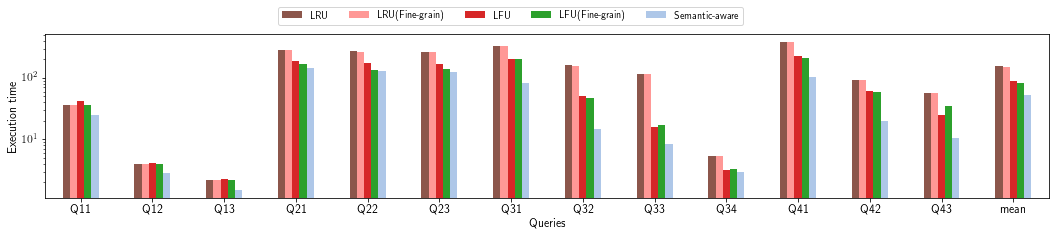

In [65]:
import json
import io

data = {}


data = """Queries,LFU,LRU,LFU(Fine-grain),LRU(Fine-grain),Semantic-aware
Q11, 41.6, 37, 37, 37, 25
Q12, 4.2, 3.97, 3.97, 3.96, 2.8
Q13, 2.3, 2.2, 2.2, 2.2, 1.5
Q21, 189, 290, 168, 284, 147
Q22, 176, 273, 134, 269, 130
Q23, 169, 266, 138, 260, 126
Q31, 204.9, 327, 202, 327, 83
Q32, 50.43, 160, 48, 159, 15
Q33, 15.8, 114, 17, 115, 8.4
Q34, 3.22, 5.3, 3.25, 5.3, 2.97
Q41, 230, 386, 212, 381, 103
Q42, 60.8, 93, 60, 91, 20
Q43, 24.6, 57, 35, 58, 10.6
"""

df = pd.read_csv(io.StringIO(data))

print(df)

df = df[['Queries','LRU', 'LRU(Fine-grain)', 'LFU', 'LFU(Fine-grain)', 'Semantic-aware']]

df2 = df.mean(axis = 0)
df2['Queries'] = 'mean'

print(df2)

df = df.append(df2, ignore_index = True)

print(df)

my_colors = list(islice(cycle([tableau20[10], tableau20[7], tableau20[6], tableau20[4], tableau20[1], tableau20[2], 'k']), None, len(df)))

plt.rcParams["figure.figsize"] = (18,3)
fig, ax = plt.subplots()
ax.set_yscale('log')
df.set_index('Queries').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=5, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Speedp", fontsize=12)
ax.set_xlabel("Queries", fontsize=12)

   Queries    TBD  Crystal-CPU  OmniSci  CoGaDB
0      Q11   2.83        29.20       38     242
1      Q12   0.56         3.26       38     172
2      Q13   0.47         3.77       36     144
3      Q21   9.20       313.00       64     444
4      Q22   9.30       291.00       58     405
5      Q23   9.00       287.00       55     319
6      Q31  12.50       321.00       62     789
7      Q32   9.00       167.00       68     374
8      Q33   8.26       122.00       60     302
9      Q34   2.21         5.10       63     117
10     Q41  13.60       376.00       95     574
11     Q42   3.90        95.00       95     286
12     Q43   9.30        59.30       95     230
CoGaDB         338.308
OmniSci        63.6154
Crystal-CPU    159.433
TBD            6.93308
Queries           mean
dtype: object
   Queries      CoGaDB    OmniSci  Crystal-CPU        TBD
0      Q11  242.000000  38.000000    29.200000   2.830000
1      Q12  172.000000  38.000000     3.260000   0.560000
2      Q13  144.000000  3

Text(0.5,0,'Queries')

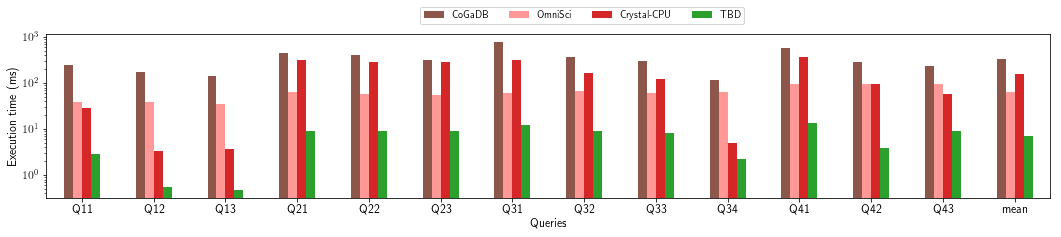

In [9]:
import json
import io

data = {}


data = """Queries,TBD,Crystal-CPU,OmniSci,CoGaDB
Q11, 2.83, 29.2, 38, 242
Q12, 0.56, 3.26, 38, 172
Q13, 0.47, 3.77, 36, 144
Q21, 9.2, 313, 64, 444
Q22, 9.3, 291, 58, 405
Q23, 9.0, 287, 55, 319
Q31, 12.5, 321, 62, 789
Q32, 9, 167, 68, 374
Q33, 8.26, 122, 60, 302
Q34, 2.21, 5.1, 63, 117
Q41, 13.6, 376, 95, 574
Q42, 3.9, 95, 95, 286
Q43, 9.3, 59.3, 95, 230
"""

df = pd.read_csv(io.StringIO(data))

print(df)

df = df[['Queries','CoGaDB','OmniSci', 'Crystal-CPU', 'TBD']]

df2 = df.mean(axis = 0)
df2['Queries'] = 'mean'

print(df2)

df = df.append(df2, ignore_index = True)

print(df)

my_colors = list(islice(cycle([tableau20[10], tableau20[7], tableau20[6], tableau20[4], tableau20[1], tableau20[2], 'k']), None, len(df)))

plt.rcParams["figure.figsize"] = (18,3)
fig, ax = plt.subplots()
ax.set_yscale('log')
df.set_index('Queries').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=4, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Execution time (ms)", fontsize=12)
ax.set_xlabel("Queries", fontsize=12)

   Queries     TBD  Crystal-CPU  OmniSci(CPU)  CoGaDB  OmniSci
0      Q11  103.00       104.00           613    4822     1616
1      Q12    8.11         8.17           821    3532     1623
2      Q13    2.17         2.19           805    3242     1612
3      Q21  563.00      1386.00          2011   14639     1303
4      Q22  524.00      1324.00          2042   14393     1226
5      Q23  494.00      1303.00          1934   13859     1223
6      Q31  318.00      1569.00          2943   16230     1131
7      Q32   41.90       918.00          2712   10874     1131
8      Q33   24.40       708.00          3288   10323     1131
9      Q34    5.38        13.50          3267    1264     1131
10     Q41  371.00      1886.00          4884   17960     5303
11     Q42   94.30       467.00          5467    7326     5303
12     Q43   20.40       276.00          5072    4959     5072
CoGaDB         9494.08
OmniSci        2215.77
Crystal-CPU    766.528
TBD            197.666
Queries           mean
dty

Text(0.5,0,'Queries')

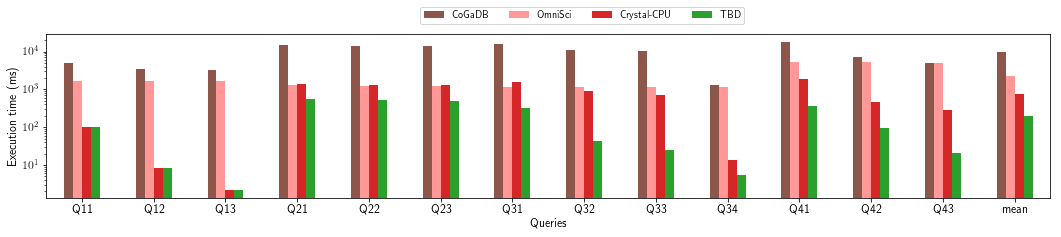

In [39]:
import json
import io

data = {}


data = """Queries,TBD,Crystal-CPU,OmniSci(CPU),CoGaDB,OmniSci
Q11, 103, 104, 613, 4822, 1616
Q12, 8.11, 8.17, 821, 3532, 1623
Q13, 2.17, 2.19, 805, 3242, 1612
Q21, 563, 1386, 2011, 14639, 1303
Q22, 524, 1324, 2042, 14393, 1226
Q23, 494, 1303, 1934, 13859, 1223
Q31, 318, 1569, 2943, 16230, 1131
Q32, 41.9, 918, 2712, 10874, 1131
Q33, 24.4, 708, 3288, 10323, 1131
Q34, 5.38, 13.5, 3267, 1264, 1131
Q41, 371, 1886, 4884, 17960, 5303
Q42, 94.3, 467, 5467, 7326, 5303
Q43, 20.4, 276, 5072, 4959, 5072
"""

df = pd.read_csv(io.StringIO(data))

print(df)

df = df[['Queries','CoGaDB', 'OmniSci', 'Crystal-CPU', 'TBD']]

df2 = df.mean(axis = 0)
df2['Queries'] = 'mean'

print(df2)

df = df.append(df2, ignore_index = True)

print(df)

my_colors = list(islice(cycle([tableau20[10], tableau20[7], tableau20[6], tableau20[4], tableau20[1], tableau20[2], 'k']), None, len(df)))

plt.rcParams["figure.figsize"] = (18,3)
fig, ax = plt.subplots()
ax.set_yscale('log')
df.set_index('Queries').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=4, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Execution time (ms)", fontsize=12)
ax.set_xlabel("Queries", fontsize=12)

            Policy  GPU  CPU  Transfer
0              LFU  0.5  0.5       0.5
1              LRU  0.5  0.5       0.5
2  LFU(Fine-grain)  0.5  0.5       0.5
3  LRU(Fine-grain)  0.5  0.5       0.5
4   Semantic-aware  0.5  0.5       0.5
            Policy  GPU  CPU  Transfer
0              LFU  0.5  0.5       0.5
1              LRU  0.5  0.5       0.5
2  LFU(Fine-grain)  0.5  0.5       0.5
3  LRU(Fine-grain)  0.5  0.5       0.5
4   Semantic-aware  0.5  0.5       0.5


Text(0.5,0,'Policy')

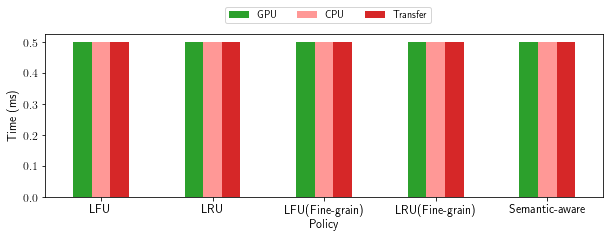

In [6]:
import json
import io

data = {}


data = """Policy,GPU,CPU,Transfer
LFU, 0.5, 0.5, 0.5
LRU, 0.5, 0.5, 0.5
LFU(Fine-grain), 0.5, 0.5, 0.5
LRU(Fine-grain), 0.5, 0.5, 0.5
Semantic-aware, 0.5, 0.5, 0.5
"""

df = pd.read_csv(io.StringIO(data))

print(df)

df = df[['Policy', 'GPU', 'CPU', 'Transfer']]

print(df)

my_colors = list(islice(cycle([tableau20[4], tableau20[7], tableau20[6], tableau20[4], tableau20[1], tableau20[2], 'k']), None, 3))

plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
df.set_index('Policy').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=5, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Time (ms)", fontsize=12)
ax.set_xlabel("Policy", fontsize=12)

  Optimization   No-Opt   Segment Skipping   Operator Pipelining  \
0          TBD    35809              15973                  4600   

    Custom Malloc  
0            4000  


Text(0.5,0,'Optimization')

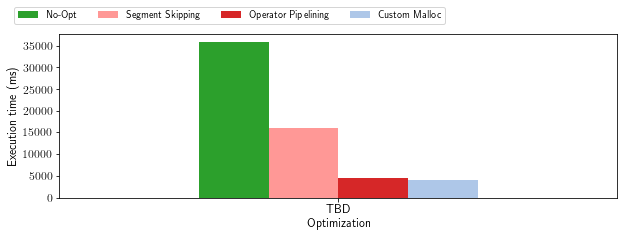

In [2]:
import json
import io

data = {}


data = """Optimization, No-Opt, Segment Skipping, Operator Pipelining, Custom Malloc
TBD, 35809, 15973, 11694, 4587
"""

data = """Optimization, No-Opt, Segment Skipping, Operator Pipelining, Custom Malloc
TBD, 35809, 15973, 4600, 4000
"""

df = pd.read_csv(io.StringIO(data))

print(df)

my_colors = list(islice(cycle([tableau20[4], tableau20[7], tableau20[6], tableau20[1], tableau20[9], tableau20[2], 'k']), None, 5))

plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
df.set_index('Optimization').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=5, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Execution time (ms)", fontsize=12)
ax.set_xlabel("Optimization", fontsize=12)

                   Opt  GPU  CPU  Transfer  Malloc
0               No-Opt  0.5  0.5       0.5     0.5
1     Segment Skipping  0.5  0.5       0.5     0.5
2        Custom Malloc  0.5  0.5       0.5     0.5
3  Operator Pipelining  0.5  0.5       0.5     0.5
                   Opt  GPU  CPU  Transfer  Malloc
0               No-Opt  0.5  0.5       0.5     0.5
1     Segment Skipping  0.5  0.5       0.5     0.5
2        Custom Malloc  0.5  0.5       0.5     0.5
3  Operator Pipelining  0.5  0.5       0.5     0.5


Text(0.5,0,'Optimization')

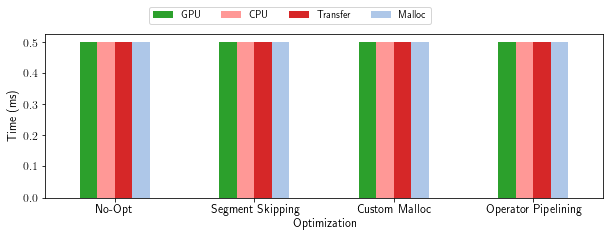

In [11]:
import json
import io

data = {}


data = """Opt,GPU,CPU,Transfer,Malloc
No-Opt, 0.5, 0.5, 0.5, 0.5
Segment Skipping, 0.5, 0.5, 0.5, 0.5
Custom Malloc, 0.5, 0.5, 0.5, 0.5
Operator Pipelining, 0.5, 0.5, 0.5, 0.5
"""

df = pd.read_csv(io.StringIO(data))

print(df)

df = df[['Opt', 'GPU', 'CPU', 'Transfer', 'Malloc']]

print(df)

my_colors = list(islice(cycle([tableau20[4], tableau20[7], tableau20[6], tableau20[1], tableau20[2], tableau20[10], 'k']), None, 4))

plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
df.set_index('Opt').plot(kind='bar', ax = ax, rot=0, color=my_colors, fontsize=12).legend(ncol=4, bbox_to_anchor=(0.7, 1.2))
ax.set_ylabel("Time (ms)", fontsize=12)
ax.set_xlabel("Optimization", fontsize=12)

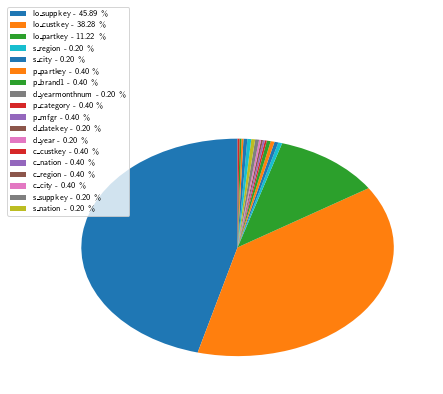

In [38]:
column = 'lo\_suppkey', 'lo\_custkey', 'lo\_partkey', 'lo\_orderdate', 'lo\_revenue', 'lo\_discount', 'lo\_quantity', 'lo\_extendedprice', 'lo\_supplycost', 'c\_custkey', 'c\_nation', 'c\_region', 'c\_city', 's\_suppkey', 's\_nation', 's\_region', 's\_city', 'p\_partkey', 'p\_brand1', 'p\_category', 'p\_mfgr', 'd\_datekey', 'd\_year', 'd\_yearmonthnum', 'empty'
    
sizes = np.array([229, 191, 56, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0])
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
porcent = 100.*sizes/sizes.sum()

fig, ax = plt.subplots()
patches, texts = ax.pie(sizes, startangle=90, radius=1)
# ax.axis('equal')
labels = ['{0} - {1:1.2f} \%'.format(i,j) for i,j in zip(column, porcent) if j > 0]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.rcParams["figure.figsize"] = (9,7)
plt.savefig('piechart.pdf', bbox_inches='tight')